# BOSTON HOUSE PRICE PREDICTION MODEL ( w Pupil-Teacher Ratio)

In [9]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
file = pd.read_csv('HousingData.csv')
file.head()
file['PRICE'] = file.MEDV * 1000
file.info()
file.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
 14  PRICE    506 non-null    float64
dtypes: float64(13), int64(2)
memory usage: 59.4 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,PRICE
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806,22532.806324
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104,9197.104087
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,5000.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000,17025.000000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000,21200.000000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,25000.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,50000.000000


Basic analysis of data loaded from the csv file : https://www.kaggle.com/datasets/altavish/boston-housing-dataset/code

In [11]:
file.dropna(inplace = True)
px.scatter(file,x='PTRATIO',y='PRICE')
x = file.PTRATIO.values
y = file.PRICE.values
w = np.random.randn()
b = np.random.randn()

Dropped null values. But in this dataset , it'll be best to not drop outliers to have a larger dataset to train the model on. We set the weight and the bias to be random to test different outputs.

In [3]:
def f(x: list,w : float,b: float)-> list:
  return [w*xval + b for xval in x]

def calc_mse_loss(yhat,y):
  loss = 0
  for yhat_val,y_val in zip(yhat,y):
    loss += (yhat_val - y_val)**2
  return loss/len(yhat)

def calc_w_grad(yhat:list,y:list,x:list):
  grad = 0
  for yhat_val,y_val,x_val in zip(yhat,y,x):
    grad += ( yhat_val - y_val)*x_val
  return grad * 2 / len(yhat)

def calc_b_grad(yhat:list,y:list):
  grad = 0
  for yhat_val,y_val in zip(yhat,y):
    grad += ( yhat_val - y_val)
  return grad * 2 / len(yhat)


This is the math behind linear regression , 
1.f is the forward pass to the model and makes predictions.
2.for mse loss - mean squared error that is used to minimize error and as it maximises stability.
3.calc w and b grad is just calculating the gradients and multiplying it with the mse loss.One calculates the loss of weights and one loss of biases.

In [4]:
calc_mse_loss(f(x,w,b),y)

579084183.0469543

In [5]:

def plot_regression_dataset(xvals, yvals, weight=None, bias=None, size=None) -> None:
    if size is None:
        size = [20 for _ in xvals]
    else:
        size = [size for _ in xvals]

    plt.figure(figsize=(20, 10))
    plt.scatter(xvals, yvals, s=size)

    if weight is not None and bias is not None:
        min_yval = weight * xvals[0] + bias
        max_yval = weight * xvals[-1] + bias
        plt.plot([xvals[0], xvals[-1]], [min_yval, max_yval], c="red")

    plt.show()


Plotting the dataset using matplotlib library.

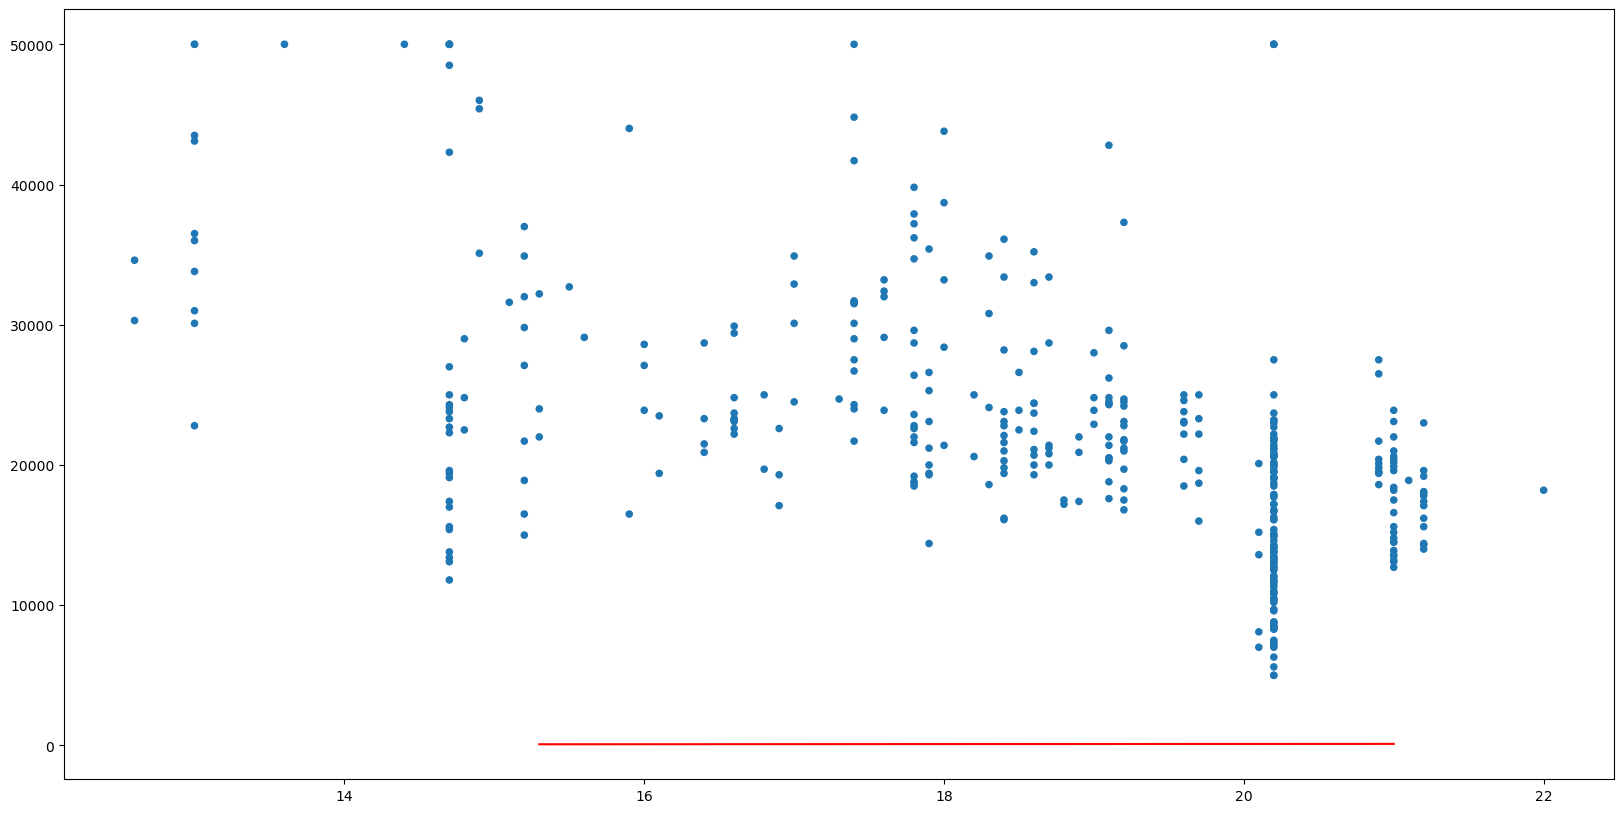

In [6]:
plot_regression_dataset(x, y, weight=w, bias=b)

In [7]:
lr = 0.000001
for i in range(1000000):
  yhat = f(x,w,b)
  wgrad = calc_w_grad(yhat,y,x)
  bgrad = calc_b_grad(yhat,y)
  w = w - (lr * wgrad)
  b = b - (lr * bgrad )

Training the model using a learning rate and taking into account the number of points.
Caution - adding more and larger number of points to loop through increased the time taken for the plot to show by leaps and bounds(speaking with experience).
# QUICK QUESTION : Try to think of the time complexity of this code.(not a trick question)

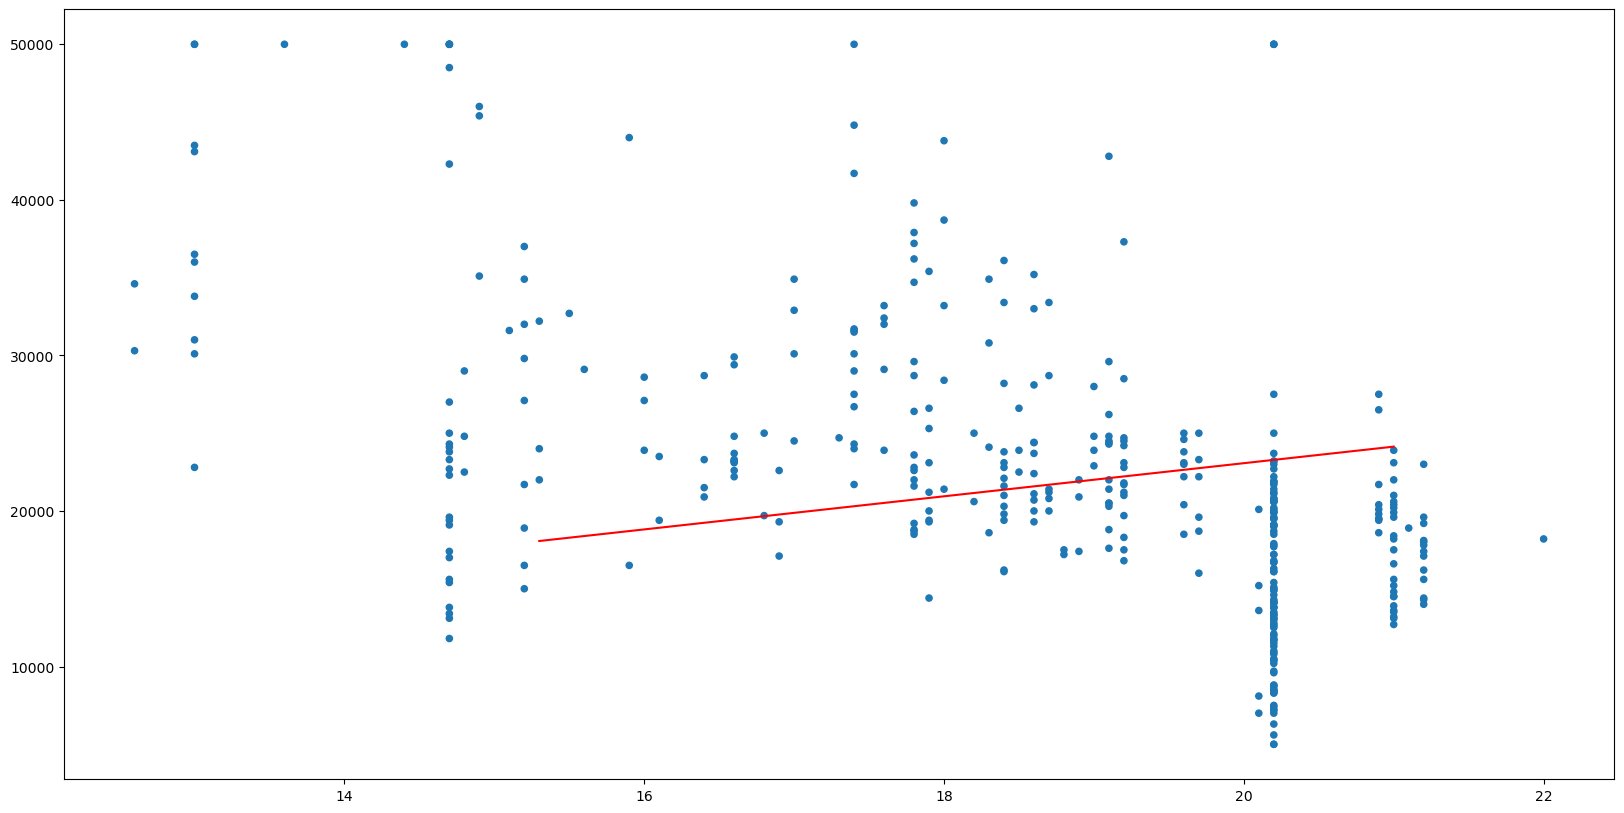

In [8]:
plot_regression_dataset(x, y, weight=w, bias=b)